In [1]:
# Question 1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

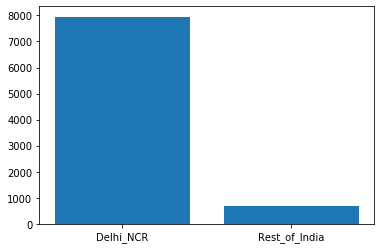

In [20]:
df =  pd.read_csv("zomato.csv",encoding='latin-1')
# Indian Restraunts have contry code 1
df = df[df['Country Code']==1]
NCR = {'New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'}
restraunt_count = {'Delhi_NCR':0,'Rest_of_India':0}
new_df = df.copy()
new_df = new_df['City']
for i in new_df :
    if i in NCR :
        restraunt_count['Delhi_NCR']+=1
    else :
        restraunt_count['Rest_of_India']+=1

temp = []
count = []
for key,value in restraunt_count.items():
    temp.append(key)
    count.append(value)

plt.bar(temp,count)
plt.show()
        
        

In [21]:
# Question 2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
# Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 
# or just it due to incomplete dataset.

In [51]:
import requests

In [55]:

df.head()
delhi_cuisines = set()
restaurant_cuisines = set()
cuisines = []
for i,j in zip(df['City'],df['Cuisines']) :
    city = i
    cuisines = j.split(", ")
    if city=="New Delhi":
        for cuisine in cuisines:
            delhi_cuisines.add(cuisine)
    else:
        for cuisine in cuisines:
            restaurant_cuisines.add(cuisine)
            

cuisines_not_present = []
for cuisine in restaurant_cuisines:
    if cuisine in delhi_cuisines:
        continue
    else:
        cuisines_not_present.append(cuisine)

print(cuisines_not_present) # list of all cuisines_not_present
# now verifying with zomato API
headers = {'user-key': '6fb7e6ade7180f59cdb103dd73acbf39'} 
url = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"
response = requests.get(url,headers=headers)
cuisines = response.json()['cuisines']

check = False
for cuisine in cuisines:
    if cuisine['cuisine']['cuisine_name'] in cuisines_not_present:
        check = True
        break
    
print(check_present)  # True shows present of cuisine in restraunts of delhi , showing incomplete dataset.

['Greek', 'German', 'Persian', 'Cajun', 'BBQ', 'Charcoal Grill', 'Malwani', 'Steak', 'Belgian']
True


In [56]:
# Question 3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


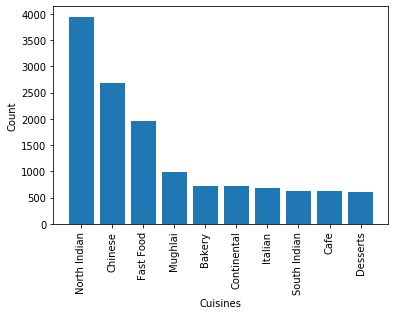

In [70]:
df.head()
cuisines_dict = {}
for i in df['Cuisines'] :
    cuisines = i.split(", ")
    for cuisine in cuisines:
        cuisines_dict[cuisine] = cuisines_dict.get(cuisine,0)+1
cuisine_count = []
for key,value in cuisines_dict.items():
    cuisine_count.append([value,key])
cuisine_count.sort(reverse = True)
cuisines = []
count = []
for i, j in cuisine_count[:10] :
    cuisines.append(j)
    count.append(i)

plt.bar(cuisines,count)
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
    
    



In [71]:
# Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. 
# Plot the suitable graph to explain your inference.

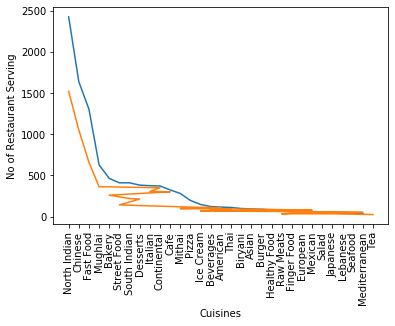

In [103]:
delhi_cuisines_count = {}
roi_cuisines_count = {}

for i,j in zip(df['City'],df['Cuisines']) :
    city = i
    cuisines = j.split(", ")
    if city=="New Delhi":
        for cuisine in cuisines:
            delhi_cuisines_count[cuisine] = delhi_cuisines_count.get(cuisine,0)+1
    else:
        for cuisine in cuisines:
            roi_cuisines_count[cuisine] = roi_cuisines_count.get(cuisine,0)+1
            
delhi_cuisines_count = [[value,key] for key,value in delhi_cuisines_count.items()]
delhi_cuisines_count.sort(reverse = True)
roi_cuisines_count = [[value,key] for key,value in roi_cuisines_count.items()]
roi_cuisines_count.sort(reverse = True)
cuisines_delhi = []
count_delhi = []
cuisines_roi = []
count_roi = []
for i, j in delhi_cuisines_count[:30] :
    cuisines_delhi.append(j)
    count_delhi.append(i)
for i, j in roi_cuisines_count[:30] :
    cuisines_roi.append(j)
    count_roi.append(i)

#Blue corresponds to restarunts serving in delhi and orange to rest of india
plt.plot(cuisines_delhi,count_delhi)
plt.xlabel("Cuisines")
plt.ylabel("No of Restaurants Serving")
plt.xticks(rotation=90)
plt.plot(cuisines_roi,count_roi)
plt.xlabel("Cuisines")
plt.ylabel("No of Restaurant Serving")
plt.xticks(rotation=90)
plt.show()       

